Copyright (c) 2025 Idiap Research Institute, http://www.idiap.ch/
Written by Amirreza Razmjoo <amirreza.razmjoo@idiap.ch>,

This file is part of smpc_poe.

smpc_poe is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License version 3 as
published by the Free Software Foundation.

smpc_poe is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with smpc_poe. If not, see <http://www.gnu.org/licenses/>.


In [1]:
import open3d as o3d
import os
cur_dir = os.getcwd()
import matplotlib.pyplot as plt
import numpy as np

print(cur_dir)
print("Testing IO for meshes ...")
mesh = o3d.io.read_triangle_mesh(cur_dir + "/../URDF/006_mustard_bottle/google_512k/nontextured.ply")
print(mesh)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
/home/amir/Git/smpc_poe/Mustard Pushing
Testing IO for meshes ...
TriangleMesh with 262146 points and 524288 triangles.


In [2]:
mesh.compute_vertex_normals()

# o3d.visualization.draw_geometries([mesh])
pcd = mesh.sample_points_uniformly(number_of_points=500)
# o3d.visualization.draw_geometries([pcd])

points = np.asarray(pcd.points)


In [3]:
centered_points = points - mesh.get_center()
Ixx = centered_points[:,0] @ centered_points[:,0]
Ixy = centered_points[:,0] @ centered_points[:,1]
Ixz = centered_points[:,0] @ centered_points[:,2]
Iyy = centered_points[:,1] @ centered_points[:,1]
Iyz = centered_points[:,1] @ centered_points[:,2]
Izz = centered_points[:,2] @ centered_points[:,2]

I = np.array([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])
_, R = np.linalg.eig(I)

In [4]:
rotated_points = R.T @ centered_points.T

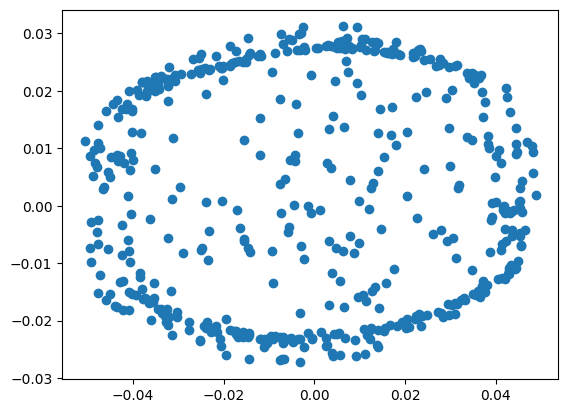

In [5]:
fig, ax = plt.subplots()
ax.scatter(rotated_points[0,:],rotated_points[1,:])

In [6]:
aligned_points = R.T @  (points - mesh.get_center()).T
np.save(cur_dir + '/mustared_aligned_points.npy',aligned_points)